# <center> 👉 class_07_5 IP » _Morphological Transformations_ »   </center>
# <center> » Erosion, Dilation, Opening, Closing, Gradient, Top Hat and Black Hat </center>
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html  

## ▣ Morphological Transformations    
    
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images.    
It needs two inputs, one is our original image, second one is called **structuring element** or kernel which decides the nature of operation.  
**Two basic morphological operators are Erosion and Dilation.**    

    형태학적 변환은 이미지 모양을 기반으로 하는 몇 가지 간단한 작업입니다. 
    여기에는 두 개의 입력이 필요합니다. 
    하나는 원본 이미지이고, 두 번째 입력은 구조화 요소 또는 작업의 성격을 결정하는 커널입니다.  
    두 가지 기본 형태학적 연산자는 침식(Erosion)과 팽창(Dilation)입니다.
    모폴로지(morphology)란 '형태학'이라는 뜻입니다.   
    이는 영상 분야에서 노이즈 제거, 구멍 채우기, 끊어진 선 이어 붙이기 등에 쓰이는 형태학적 연산을 말합니다.  
    모폴로지 연산은 검은색과 흰색으로만 구성되어 있는 바이너리(binary) 이미지에 적용할 수 있습니다. 

Then its variant forms like Opening, Closing, Gradient etc :  

1. **Erosion : cv2.erode(src, kernel, anchor, iterations, borderType, borderValue)**
>- _the effect of removing noise in dark parts_   
2. **Dilation : cv2.dilate(src, kernel, dst, anchor, iterations, bordeType, borderValue)**
>- _the effect of removing noise in bright parts_   

✓ 1 & 2 : The denoising effect is good, but the original shape becomes thinner or fatter.  
✓ However, _combining erosion and dilation operations can achieve the effect of removing noise while preserving the original shape._  

3. **Opening: cv2.morphologyEx(src, op, kernel, dst, anchor, iteration, borderType, borderValue);**
>- **Erosion => + Dilation**
>- _This is effective for removing noise that is brighter than the surroundings. It is also effective at isolating isolated objects that appear to be touching or removing protruding shapes._    
        주변보다 밝은 노이즈를 제거하는데 효과적입니다. 튀어나온 형상에 닿거나 제거된 것처럼 보이는 고립된 개체를 분리하는 데에도 효과적입니다.  
4. **Closing:**-**Dilation => + Erosion**
>- _It's effective at removing noise that is darker than its surroundings, as well as connecting objects that appear broken or filling holes._    
        주변보다 어두운 노이즈를 제거하는 데 효과적이며, 깨진 것처럼 보이는 물체를 연결하거나 구멍을 채우는 데에도 효과적입니다.  
5. **Gradient:- Dilation - Erosion**- _only the border pixels remain_  
    
6. **Top Hat: Original Img - Opening**
>- _Subtracting the result of applying an open operation from the original can emphasize highlights with large jumps in value_      
        원본에서 열린 작업을 적용한 결과를 빼면 값이 크게 점프하는 하이라이트를 강조할 수 있습니다.  
7. **Black Hat: Closing - Original Img**
>- _emphasize the dark parts_   

8. **HitMiss**  

~ Parameters:  
    
- src: Input Image, binary
- op: Types of Morphological Operations  
>- cv2.MORPH_OPEN, 
>- cv2.MORPH_COLSE, 
>- cv2.MORPH_GRADIENT, 
>- cv2.MORPH_TOPHAT, 
>- cv2.MORPH_BLACKHAT  
- kernel: Structuring Element (We manually created a structuring elements: kernel = np.ones((3,3),np.uint8))
>- It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.  
>- **cv2.getStructuringElement(shape, ksize, anchor)** 
>>- shape: shape of the kernel (cv2.MORPH_RECT, cv2.MORPH_EPLIPSE, cv2.MORPH_CROSS)
>>- ksize: size of the kernel 
>>- anchor(optional): Base point of structuring element, Only meaningful for cv2.MORPH_CROSS, defaults to center point (-1, -1)  
>- Rectangular Kernel: cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)):   
        array([[1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1]], dtype=uint8)  
>- Elliptical Kernel: cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)):   
        array([[0, 0, 1, 0, 0],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [0, 0, 1, 0, 0]], dtype=uint8)  
>- Cross-shaped Kernel: cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)):   
        array([[0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [1, 1, 1, 1, 1],
               [0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0]], dtype=uint8)  

- anchor(optional): It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center.
- iterations(optional): It is number of times (erosion) is applied.
- boderType(optional): It depicts what kind of border to be added (cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc.)
- boderValue(optional): It is border value in case of a constant border.
        

## 1. Erosion
The basic idea of erosion is just like soil erosion only, __it erodes away the boundaries of foreground object (Always try to keep foreground in white).__   
- The kernel slides through the image (as in 2D convolution).   
- A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).  
- So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel.   
- So the thickness or size of the foreground object decreases or __simply white region decreases__ in the image.   
- It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let’s see it how it works:

$$ erode(x,y) = \underset{(i,j)\in kernel}{min} src(x + i, y + j) $$
    
        - 침식(erosion)은 커널 영역 안에 존재하는 모든 픽셀의 값을 커널 내부의 극소값(local minimum)으로 대체합니다.  
        - 즉, 구조 요소(element)를 활용해 이웃한 픽셀을 최소 픽셀값으로 대체합니다.  
        - 침식 연산을 적용하면 밝은 영역이 줄어들고 어두운 영역이 늘어납니다.
        - 커널의 크기나 반복 횟수에 따라 어두운 영역이 늘어나 스펙클(speckle)이 사라지며, 객체 내부의 홀(holes)이 커집니다.
        - 침식 연산은 노이즈 제거에 주로 사용합니다.

Erosion literally means cutting away. Therefore, erosion means movement that reduces the image.
We need a structuring element kernel called Start with 0 and 1.
Structuring elements 1 can be used as tables, crosses, etc., depending on the shape of the front surface.

The bedroom style applies a structured element partition to the input image, changing the corresponding balcony to 0 in addition to the chair that can go upwards to 1.
Below is shown during erosion with cross-shaped structuring elements.  
    
        침식(erosion)이란 말 그대로 형태를 깎아 내는 것입니다. 따라서 침식 연산은 이미지를 깎아 내는 연산을 뜻합니다.     
        침식 연산을 위해서는 구조화 요소 커널(structuring element kernel)이라는 0과 1로 구성된 커널이 필요합니다.     
        구조화 요소 커널은 1이 채워진 모양에 따라 사각형, 타원형, 십자형 등으로 사용할 수 있습니다.  

        침식 연산은 구조화 요소 커널을 입력 이미지에 적용해서 1로 채워진 영역을 온전히 올려 놓을 수 없으면 해당 픽셀을 0으로 변경합니다.   
        아래는 십자형 구조화 요소 커널로 침식 연산을 하는 과정을 보여줍니다. 

<img src='./images/practice_img/erosion1.png' width=500 height=400>

<center> http://blog.daum.net/shksjy/314</center>   

In image A, let's say the white background is 0 and the light blue foreground is 1.   
B is the cruciform structured element kernel.
- You can think of all the gray parts, including the center, as consisting of 1.
- At this time, the center of the cruciform structuring element kernel (the red dot area) scans the blue part of the A image.
- As we go through each space, if the structuring element kernel does not completely overlap the light blue part of the A image, we change it to 0.
- If they completely overlap, leave it at 1. On the right is the result of the erosion operation.
- Originally, all light blue parts were 1, but as a result of the erosion operation, only the part with the red 1 remains as 1, and all other parts are changed to 0.
- You can see that it has been shaved off a bit compared to the original image.
- The erosion operation functions to cut away the surroundings of large objects.   
- In addition, it has the effect of removing noise by completely eliminating small objects, and is also effective in separating overlapping objects that are originally separate objects.  

    
        A 이미지에서 흰색 배경은 0이고, 하늘색 전경은 1이라고 합시다. B는 십자형 구조화 요소 커널입니다.   
        가운데를 포함해서 회색 부분이 다 1로 구성되어 있다고 보면 됩니다.   
        이때 십자형 구조화 요소 커널의 중심부(빨간 점 부분)는 A 이미지의 파란색 부분을 쭉 훑습니다.   
        한 칸 한 칸 훑으면서 구조화 요소 커널이 A 이미지의 하늘색 부분과 완전히 겹치지 않을 때는 0으로 변경합니다.   
        완전히 겹치면 1로 그대로 둡니다. 오른쪽은 침식 연산의 결과입니다.   
        원래 하늘색 부분이 모두 1이었는데, 침식 연산 결과 빨간 1이 적혀 있는 부분만 1로 남아 있고 나머지 부분은 모두 0으로 변경됩니다.  
        원본 이미지보다 조금 깎인 것을 볼 수 있습니다.
        침식 연산은 큰 물체의 주변을 깎는 기능을 합니다. 더불어 작은 물체는 아예 없애버리므로 노이즈 제거 효과도 있고, 원래는 떨어져 있는 물체인데 겹쳐 있는 것을 서로 떼어내는 데도 효과적입니다.

In [1]:
import numpy as np
import cv2

src = cv2.imread('./images/practice_img/zebra.webp')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
erode = cv2.erode(src, kernel, anchor=(-1, -1), iterations=5)
dilate = cv2.dilate(src, kernel, anchor=(-1, -1), iterations=5)

dst = np.concatenate((src, erode, dilate), axis=1) # axis=1 horizontal,  axis=0 connect vertically
                                                   # same as cv2.hconcat, cv2.vconcat
cv2.namedWindow('WINDOW_NORMAL', cv2.WINDOW_NORMAL)              
cv2.imshow('WINDOW_NORMAL', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

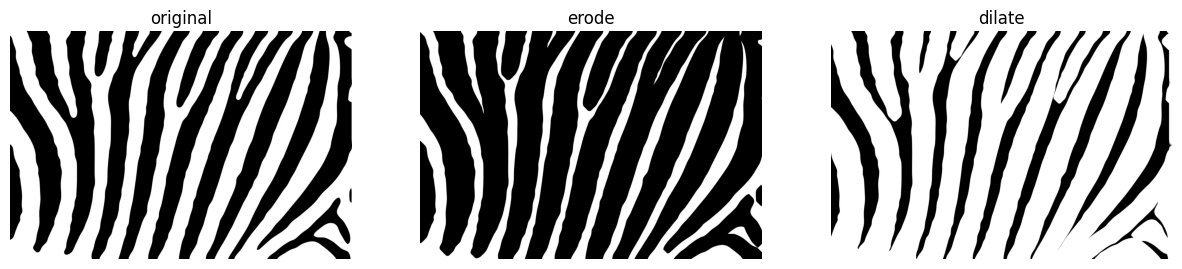

In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(erode, cv2.COLOR_BGR2RGB)),plt.title('erode'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB)),plt.title('dilate'),plt.axis('off')

plt.show()

In [3]:
# Erosion (morph_erode.py)

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/morph_dot.png', 0)

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) 
# kernel = np.ones((5,5),np.uint8)
# erosion = cv2.erode(img,kernel,iterations = 1)
erosion = cv2.erode(img, k) 
# merged = np.hstack((img, erosion))

cv2.imshow('Erode', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

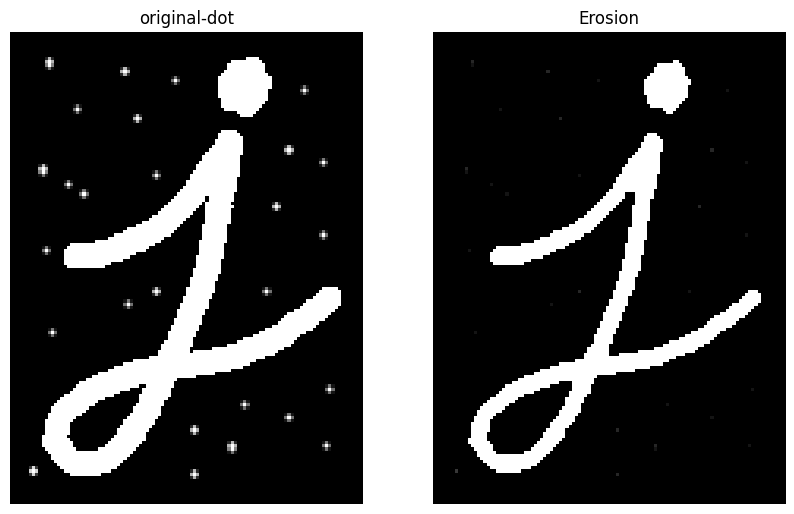

In [4]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(img,'gray'), axs[0].axis('off'), axs[0].set_title('original-dot')
axs[1].imshow(erosion, 'gray'), axs[1].axis('off'), axs[1].set_title('Erosion')

plt.show()

## 2. Dilation (팽창) 

dilation replaces the values of all pixels within the kernel area with the local maximum inside the kernel.
- In other words, neighboring pixels are replaced with the maximum pixel value using a structural element.
- Applying the dilation operation reduces dark areas and increases light areas.
- Depending on the size of the kernel or the number of repetitions, the bright area increases, speckles increase, and holes inside the object disappear.
- The dilation operation is mainly used when trying to restore the reduced size after noise removal.  

$$ dilate(x,y) = \underset{(i,j)\in kernel}{max} src(x + i, y + j) $$

        dilation 은 커널 영역 안에 존재하는 모든 픽셀의 값을 커널 내부의 극댓값(local maximum)으로 대체합니다.  
        - 즉, 구조 요소(element)를 활용해 이웃한 픽셀들을 최대 픽셀값으로 대체합니다.
        - 팽창 연산을 적용하면 어두운 영역이 줄어들고 밝은 영역이 늘어납니다.
        - 커널의 크기나 반복 횟수에 따라 밝은 영역이 늘어나 스펙클(speckle)이 커지며 객체 내부의 홀(holes)이 사라집니다.  
        - 팽창 연산은 노이즈 제거 후 줄어든 크기를 복구하고자 할 때 주로 사용합니다.



It is just opposite of erosion.   
- Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’.   
- So it increases the white region in the image or size of foreground object increases.   
- **Normally, in cases like noise removal, erosion is followed by dilation.**   
- Because, erosion removes white noises, but it also shrinks our object. So we dilate it.   
- Since noise is gone, they won't come back, but our object area increases.   
- It is also useful in joining broken parts of an object.

        - 팽창(dilatation)은 침식과 반대로 물체의 주변을 확장하는 연산입니다. 연산 방법도 반대입니다.   
        - 침식 연산은 구조화 요소 커널이 입력 영상에서 1로 채워진 영역과 완전히 겹치지 않으면 0으로 변경했습니다.   
        - 그러나 팽창 연산은 이와 반대로 완전히 겹치지 않으면 1로 변경합니다.   
        - 아래 예시에서 구조화 요소 커널은 십자형이 아님에 유의하기 바랍니다.
<img src='./images/practice_img/dilate2.png' width=500 height=400>

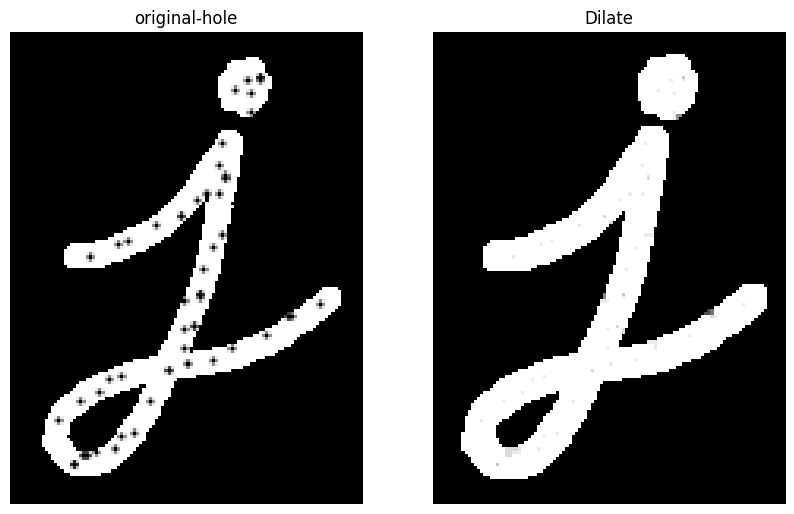

In [5]:
# morph_dilate.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/morph_hole.png', 0)

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.dilate(img, k)
merged = np.hstack((img, dilate))

cv2.imshow('Dilation', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(img, 'gray' ), axs[0].axis('off'), axs[0].set_title('original-hole')
axs[1].imshow(dilate, 'gray'), axs[1].axis('off'), axs[1].set_title('Dilate')

plt.show()

## ▣ Morphological Calculation 

Morphological operations are transformation operations that apply advanced morphology using dilation and erosion of morphological transformations as basic operations.  
        모폴로지 연산은 모폴로지 변환의 팽창(dilation)과 침식(erosion)을 기본 연산으로 사용해 고급 형태학을 적용하는 변환 연산입니다.  

## 3. Opening

Erosion and expansion have a good noise removal effect, but they cause the original shape to become thinner or fatter.
However, by combining the erosion and expansion operations, you can achieve the effect of removing noise while maintaining the original shape.  
The opening operation is a combination of the dilation operator and the erosion operator, applying the erosion operation and then applying the dilation operation.  

        침식과 팽창은 노이즈 제거 효과는 좋으나 원래 모양이 홀쭉해지거나 뚱뚱해지는 변형이 일어납니다.   
        하지만 침식과 팽창의 연산을 조합하면 원래의 모양을 유지하면서 노이즈를 제거하는 효과를 거둘 수 있습니다.  
        열림 연산은 팽창 연산자와 침식 연산자의 조합이며, 침식 연산을 적용한 다음, 팽창 연산을 적용합니다.
        열림 = 침식 + 팽창

$$ opening = dilate(erode(src)) $$  

Applying the opening operation gives
- The erosion operation reduces bright areas and increases dark areas.
- If you apply the dilation operation to restore the reduced area, the dark area will decrease and the light area will increase.
- This allows the reduction in the size of the object that occurred as the speckle disappears to be restored to its original state.  

        열림 연산을 적용하면 
        - 침식 연산으로 인해 밝은 영역이 줄어들고 어두운 영역이 늘어납니다.
        - 줄어든 영역을 다시 복구하기 위해 팽창 연산을 적용하면 반대로 어두운 영역이 줄어들고 밝은 영역이 늘어납니다.
        - 이로 인해 스펙클(speckle)이 사라지면서 발생한 객체의 크기 감소를 원래대로 복구할 수 있습니다.

Opening is just another name of erosion followed by dilation.   
The opening operation is effective in removing noise that is brighter than the surrounding area.
It is also effective for separating independent objects that appear to be touching or removing protruding shapes.  

        - 열림 연산은 주변보다 밝은 노이즈를 제거하는데 효과적임.  
        - 또한 맞닿아 있는 것처럼 보이는 독립된 개체를 분리하거나 돌출된 모양을 제거하는 데 효과적임.   

## 4. Closing  

It is a combination of the dilation operator and the erosion operator, and as opposed to opening, the dilation operation is applied and then the erosion operation is applied.
__The closing operation reduces the dark area and increases the light area__ due to the expansion operation.
Applying an erosion operation to recover the stretched areas reduces the bright areas and increases the dark areas.
As a result, the size increase that occurred when the holes inside the object disappear can be restored to their original state.  

        팽창 연산자와 침식 연산자의 조합이며, 열림과 반대로 팽창 연산을 적용한 다음, 침식 연산을 적용합니다.  
        닫힘 연산은 팽창 연산으로 인해 어두운 영역이 줄어들고 밝은 영역이 늘어납니다.  
        늘어난 영역을 다시 복구하기 위해 침식 연산을 적용하면 밝은 영역이 줄어들고 어두운 영역이 늘어납니다.  
        그로 인해 객체 내부의 홀(holes)이 사라지면서 발생한 크기 증가를 원래대로 복구할 수 있음.  
        닫힘 = 팽창 + 침식  
        
$$ closing = erode(dilate(src)) $$  

It is useful in closing small holes inside the foreground objects, or small black points on the object.  
The closing operation is effective in removing noise that is darker than the surrounding area, and is also effective in connecting objects that appear disconnected or filling holes.  
        - 전경 개체 내부의 작은 구멍이나 개체의 작은 검은 점을 막는 데 유용합니다.  
        - 주변보다 어두운 노이즈를 제거하는데 효과적이면서 끊어져 보이는 개체를 연결하거나 구멍을 메우는 데 효과적임 

### Example of Opening and Closing

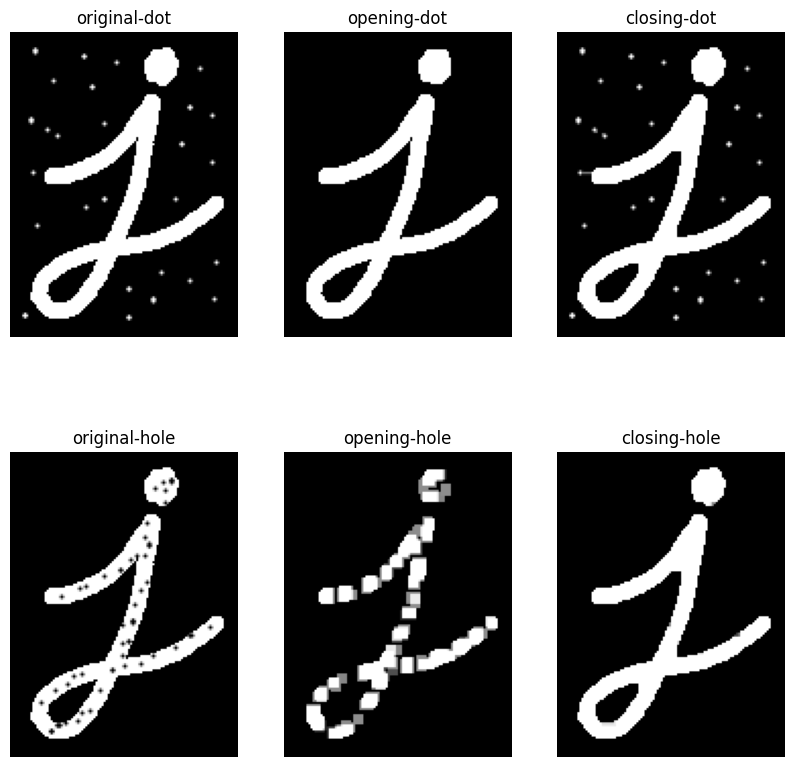

In [6]:
# morph_open_close.py

import cv2
import numpy as np

img1 = cv2.imread('./images/practice_img/morph_dot.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./images/practice_img/morph_hole.png', cv2.IMREAD_GRAYSCALE)    

k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) 

opening1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k) 
closing1 = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, k) 

opening2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, k) 
closing2 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k) 

merged1 = np.hstack((img1, opening1))
merged2 = np.hstack((img2, closing2))
merged3 = np.vstack((merged1, merged2))

cv2.imshow('opening, closing', merged3)
cv2.waitKey(0)
cv2.destroyAllWindows()

import matplotlib.pylab as plt

fig, axs = plt.subplots(2, 3, figsize=(10,10))
axs[0, 0].imshow(img1, 'gray'), axs[0, 0].axis('off'), axs[0, 0].set_title('original-dot')
axs[0, 1].imshow(opening1, 'gray'), axs[0, 1].axis('off'), axs[0, 1].set_title('opening-dot')
axs[0, 2].imshow(closing1, 'gray'), axs[0, 2].axis('off'), axs[0, 2].set_title('closing-dot')
axs[1, 0].imshow(img2, 'gray'), axs[1, 0].axis('off'), axs[1, 0].set_title('original-hole')
axs[1, 1].imshow(opening2, 'gray'), axs[1, 1].axis('off'), axs[1, 1].set_title('opening-hole')
axs[1, 2].imshow(closing2, 'gray'), axs[1, 2].axis('off'), axs[1, 2].set_title('closing-hole')

plt.show()

## 5. Gradient

Gradients separate the edges of bright areas and return the highest results where the grayscale image changes most sharply.  
__If you subtract the image to which the erosion operation has been applied from the image to which the dilation operation has been applied, only border pixels are obtained, which is similar to the border detection seen earlier.__   
This type of operation is called a gradient operation.  
Morphological Gradient is the difference between dilation and erosion of an image.   
The result will look like the outline of the object.  

        그레이디언트는 밝은 영역의 가장자리를 분리하며 그레이스케일 이미지가 가장 급격하게 변하는 곳에서 가장 높은 결과를 반환합니다.
        팽창 연산을 적용한 이미지에서 침식 연산을 적용한 이미지를 빼면 경계 픽셀만 얻게 되는데, 이는 앞서 살펴본 경계 검출과 비슷합니다.   
        이런 연산을 그레디언트(gradient) 연산이라고 합니다.
        형태학적 그라데이션은 이미지의 팽창과 침식의 차이입니다. 결과는 개체의 윤곽선처럼 보입니다.  

It is __a combination of the dilation and the erosion__ operator, and unlike the opening or closing operation,   
- the dilation operation and the erosion operation are applied to the input image respectively   
- and then subtraction is performed.    
- Compared to the input image, the dilation operation has a larger bright area,
- Conversely, the erosion operation results in a smaller bright area.
- If you subtract each result, the edges of the object in the input image are returned.  

        팽창 연산자와 침식 연산자의 조합이며, 열림 연산이나 닫힘 연산과 달리   
        - 입력 이미지에 각각 팽창 연산과 침식 연산을 적용하고 감산을 진행합니다.  
        - 입력 이미지와 비교했을 때 팽창 연산은 밝은 영역이 더 크며,   
        - 반대로 침식 연산은 밝은 영역이 더 작습니다.  
        - 각각의 결과를 감산한다면 입력 이미지에 객체의 가장자리가 반환됩니다.  
        그레디언트 = 팽창 - 침식

$$ gradient = dilate(src) - erode(src) $$  

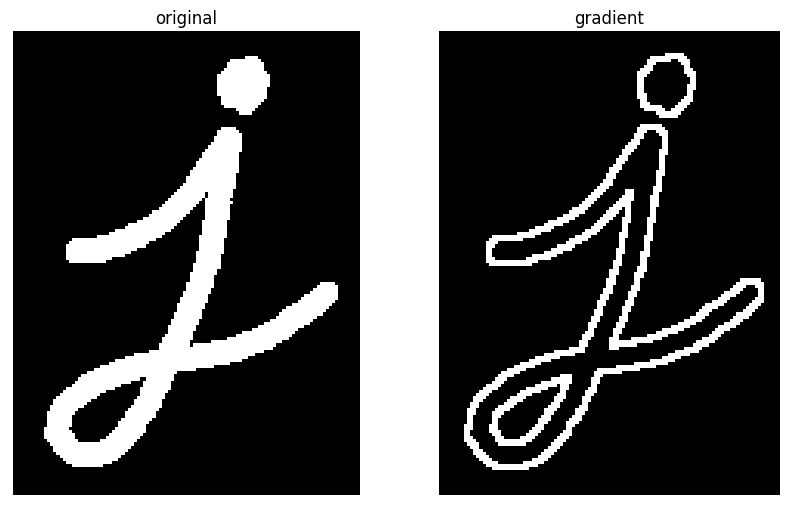

In [7]:
# morph_gradient.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/morphological.png')

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)

merged = np.hstack((img, gradient))
cv2.imshow('gradient', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('gradient')

plt.show()

## 6. Top Hat  

It is __a combination of input image (src) and opening,__   
- and similar to gradient operation, __it subtracts the image by applying opening operation__ to the input image.  
- The image to which the opening operation is applied is the result in which the speckle disappears and the size of the object is preserved.  
- If this result is subtracted from the input image, __bright areas will be separated and missing speckles or small areas will appear.__
- That is, objects in the input image are excluded and locally bright parts are separated.  
- __It is the difference between input image and Opening of the image. (By subtracting the result of applying the open operation from the original, you can emphasize bright areas where the values jump significantly)__   
- __The top hat operation marks elements that will disappear in the open operation.__  

        입력 이미지(src)와 열림(Opening)의 조합이며,   
        그레이디언트 연산과 비슷하게 입력 이미지에 열림 연산을 적용한 이미지를 감산합니다.
        열림 연산이 적용된 이미지는 스펙클이 사라지고 객체의 크기가 보존된 결과입니다.
        이 결과를 입력 이미지에서 감산한다면 밝은 영역이 분리되어 사라졌던 스펙클이나 작은 부분들이 표시됩니다.
        즉, 입력 이미지의 객체들이 제외되고 국소적으로 밝았던 부분들이 분리됩니다.
        입력 이미지와 Opening의 차이입니다. (원본에서 열림 연산 적용 결과를 빼면 값이 크게 튀는 밝은 영역을 강조할 수 있음)  
        탑햇 연산은 열림 연산에서 사라질 요소들을 표시합니다.  
        탑햇 = src - 열림(src)  
        
$$ tophat = src - open(src) $$  

## 7. Black Hat  

__You can emphasize dark areas by subtracting the original from the result of applying the closing operation.__   
This is called black hat operation.  
Black Hat is __the difference between the closing of the input image and input image.__
- Similar to the top hat operation, __the input image is subtracted from the image to which the closing operation has been applied.__  
- The image to which the closing operation is applied is the result in which the hole inside the object disappears and the size of the object is preserved.
- If you subtract the input image from this result, __the dark area will be filled and disappearing holes will be displayed.__
- That is, objects in the input image are excluded and locally dark holes are separated.
- __Black hat operations mark elements that will disappear in the closing operation.__  

        닫힘 연산 적용 결과에서 원본을 빼면 어두운 부분을 강조할 수 있습니다. 이를 블랙햇(black hat) 연산이라고 합니다.    
        Black Hat은 입력 이미지와 입력 이미지의 Closing 차이입니다. 
        - 탑햇 연산과 비슷하게 닫힘 연산을 적용한 이미지에 입력 이미지를 감산합니다.
        - 닫힘 연산이 적용된 이미지는 객체 내부의 홀이 사라지고 객체의 크기가 보존된 결과입니다.
        - 이 결과에 입력 이미지를 감산한다면 어두운 영역이 채워져 사라졌던 홀 등이 표시됩니다.
        - 즉, 입력 이미지의 객체들이 제외되고 국소적으로 어두웠던 홀들이 분리됩니다.
        - 블랙햇 연산은 닫힘 연산에서 사라질 요소들을 표시합니다.  
        - 블랙햇 = 닫힘 - src  
        
$$ blackhat = close(src) - src $$  

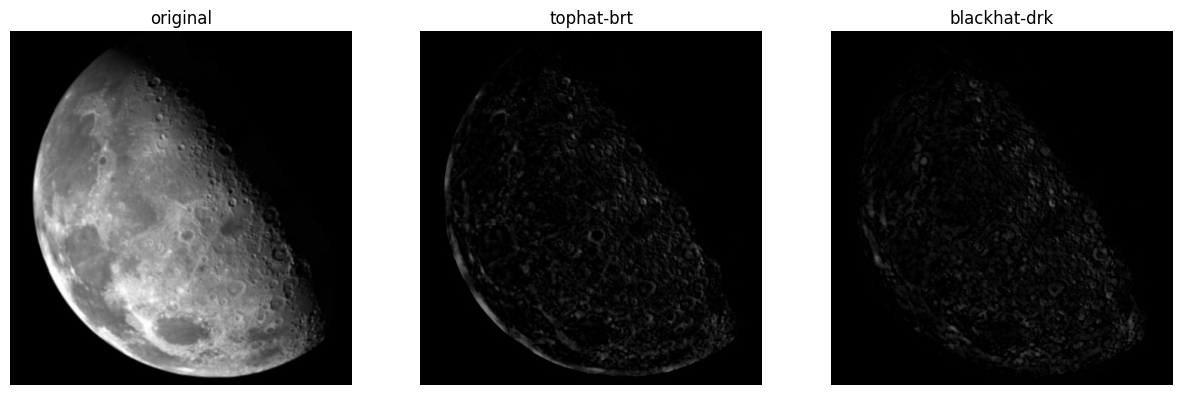

In [8]:
# top hat / black hat (morph_hat.py)

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/moon_gray.jpg')

k = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

merged = np.hstack((img, tophat, blackhat))
cv2.imshow('tophat blackhat', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(tophat, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tophat-brt')
axs[2].imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('blackhat-drk')

plt.show()

The top hat emphasizes the bright part of the moon, and the black hat emphasizes the dark part of the moon.

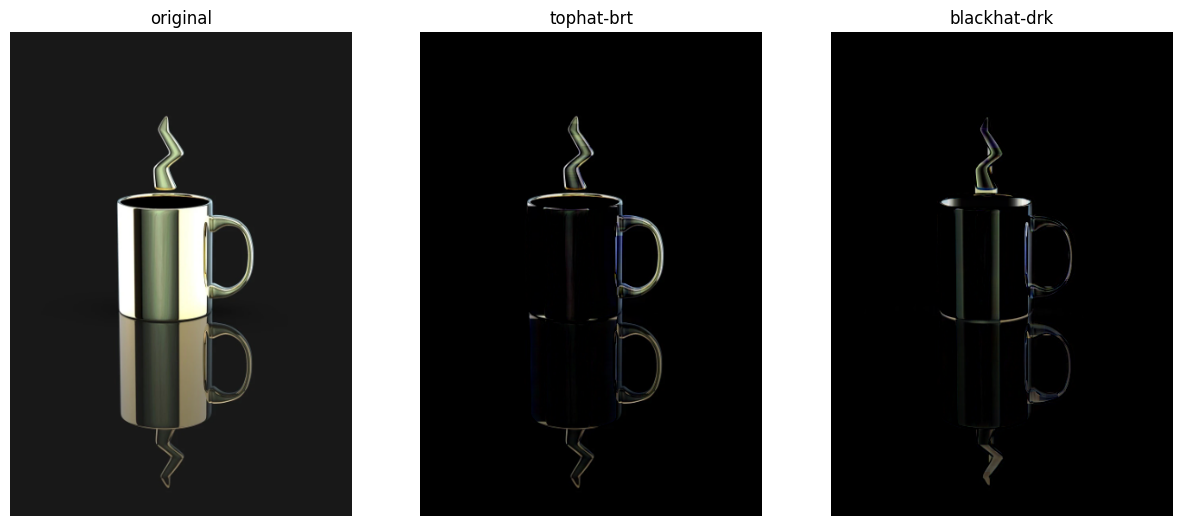

In [9]:
import cv2
import numpy as np

img = cv2.imread('./images/practice_img/mug.png')

k = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

merged = np.hstack((img, tophat, blackhat))
cv2.imshow('tophat blackhat', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(tophat, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tophat-brt')
axs[2].imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('blackhat-drk')

plt.show()

## 8. HitMiss

The HitMiss operation is different from the previous operator.  
The hit-miss operation is utilized on single-channel images and is mainly applied to binarized images.  
__Hit-miss operations are binary morphologies used to find specific patterns in the foreground or background pixels of an image and are strongly influenced by the shape of the structural elements.__  
The kernel of the hit-miss operation plays a different role from the existing convolution kernel.  
The values of the inner elements are only meaningful: 0 or 1.
- 0 inside the kernel means not to consider that pixel, and 1 means to keep that element.
- Thanks to this characteristic, __hit-miss calculations are also used to detect corners.__  

        히트미스(HitMiss) 연산은 앞의 연산자와 다른 형태입니다.
        히트미스 연산은 단일 채널 이미지에서 활용하며, 주로 이진화 이미지에 적용합니다.
        히트미스 연산은 이미지의 전경이나 배경 픽셀의 특정 패턴을 찾는 데 사용하는 이진 형태학으로서 구조 요소의 형태에 큰 영향을 받습니다.
        히트미스 연산의 커널은 기존 컨벌루션 커널과 다른 역할을 합니다.
        내부 요소의 값은 0 또는 1의 값만 의미가 있습니다.
        - 커널 내부의 0은 해당 픽셀을 고려하지 않는다는 의미이며, 1은 해당 요소를 유지하겠다는 의미입니다.
        - 이 특성 덕분에 히트미스 연산을 모서리(Corner)를 검출하는 데 활용하기도 합니다.

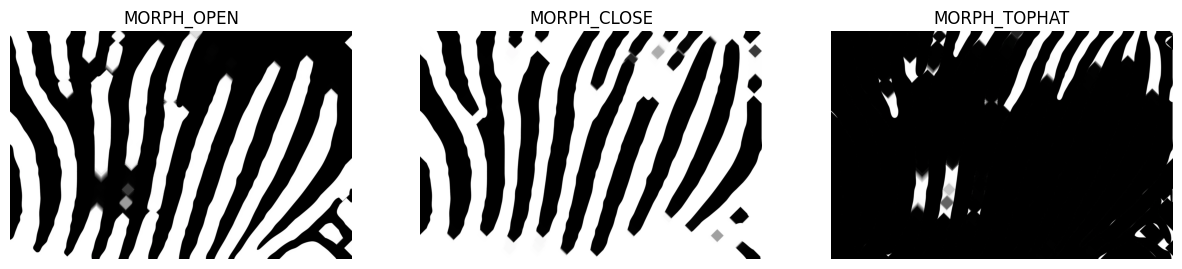

In [11]:
# HitMiss
import numpy as np
import cv2

src = cv2.imread('./images/practice_img/zebra.webp')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
dst1 = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel, iterations=9) 
dst2 = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel, iterations=9) 
dst3 = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations=9) 
cv2.namedWindow('WINDOW_NORMAL1', cv2.WINDOW_NORMAL)            
cv2.namedWindow('WINDOW_NORMAL2', cv2.WINDOW_NORMAL)            
cv2.namedWindow('WINDOW_NORMAL3', cv2.WINDOW_NORMAL)            

cv2.imshow('WINDOW_NORMAL1', dst1)
cv2.imshow('WINDOW_NORMAL2', dst2)
cv2.imshow('WINDOW_NORMAL3', dst3)
# cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)),plt.title('MORPH_OPEN'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)),plt.title('MORPH_CLOSE'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)),plt.title('MORPH_TOPHAT'),plt.axis('off')

plt.show()